### Visualization functions

In [1]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=1):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
        
    plt.figure(figsize=(12, 12))
    plt.axis('on')
    plt.imshow(img)

### Import required libraries

In [2]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import random
import os

#### Visualize original image


In [15]:
dataset_folder = "/home/rudy/Documents/cc7221/tarea3/data/orand-car-with-bbs/training"
images = glob.glob(os.path.join(dataset_folder, "images", "*"))

random_image = random.choice(images)
random_image_name = Path(random_image).stem

img_path = random_image
img_annotations = os.path.join(dataset_folder, "annotations", f"{random_image_name}.txt")

# read annotations
with open(img_annotations, "r") as f:
    lines = f.readlines()

# boxes: xywh
bboxes = []
for line in lines:
    s = line.rstrip().split(":")
    class_label = int(s[0])
    bbox_coords = [max(0, int(c)) for c in s[1].split(",")]
    bboxes.append({
        "box": bbox_coords,
        "label": class_label,
    })

In [21]:
print(f"Displaying: {random_image_name}")
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Displaying: b_car_004637


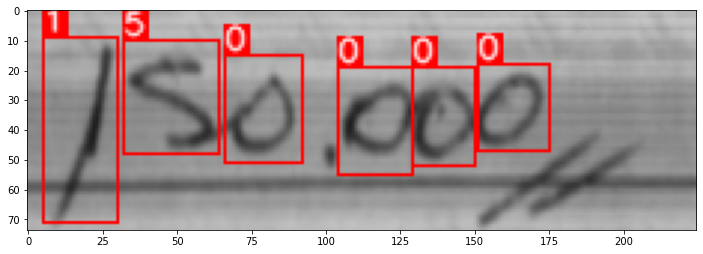

In [22]:
bboxes_list = [b['box'] for b in bboxes]
category_ids = [b['label'] for b in bboxes]
category_id_to_name = dict(zip(category_ids, [str(s) for s in category_ids]))
visualize(image, bboxes_list, category_ids, category_id_to_name)

#### Visualize transformed image

In [18]:
transform = A.Compose([
    A.Resize(65, 271), # here we can add other transformations as well
], bbox_params=A.BboxParams(format='coco', min_area=128, min_visibility=0.1, label_fields=['category_ids']))

In [19]:
transformed = transform(image=image, bboxes=bboxes_list, category_ids=category_ids)
for bbox in transformed['bboxes']:
    print(", ".join([f"{c:.0f}" for c in bbox]))

6, 8, 30, 54
39, 9, 39, 33
79, 13, 31, 32
125, 17, 30, 32
155, 17, 25, 29
182, 16, 29, 25
